# Code Parameters 
* The discount factor, gamma has been set to 0.9
* The environment is slippery, ie., the transition kernel is stochastic

In [6]:
import gym
from gym.envs.registration import register
#egister(
#    id='D4x4-FrozenLake-v0',
#    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
#    kwargs={'map_name': '4x4',
#            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')
gamma=0.9

# The Environment

* The environment consists of 16 states. (env.nS: count of state (int))
* The agent can take 4 actions (env.nA: count of action (int))
* The transition kernel P is a dictionary. 
* P[state][action] is tuples with (probability, nextstate, reward, terminal)
* For more information https://gym.openai.com/envs/FrozenLake-v0/

In [17]:
print('Number of Actions', env.nA) 
print('Number of States ', env.nS)
print('P[5,0]', env.P[15][0])

Number of Actions 4
Number of States  16
P[5,0] [(1.0, 15, 0, True)]


In [16]:
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

# Generating a Heatmap 
* Pass the optimal value function and policy to the function fancy_visual to obtain a heat map.
* This function also prints the value function and policy. Hence you do not have to print it. 

Value Function [0.59977902 0.39092673 0.14280011 0.45866563 0.4591256  0.04598182
 0.79628678 0.54043946 0.20968738 0.26956787 0.02456483 0.08945223
 0.25715819 0.12342941 0.70097938 0.48890108]
Policy [1 2 2 1 0 2 1 2 2 2 2 2 0 2 0 1]


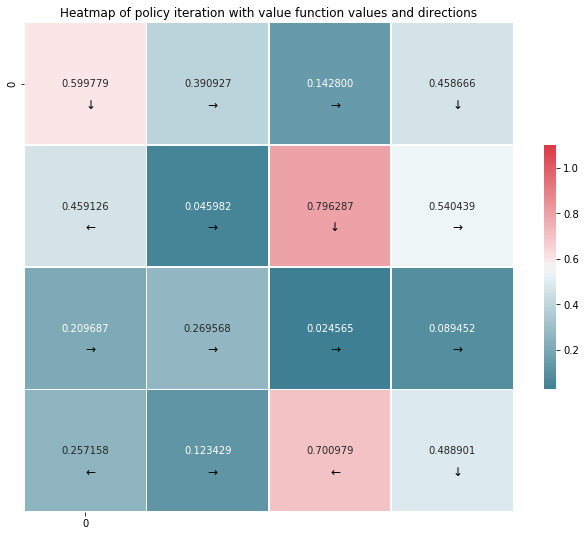

In [7]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

test_value=np.random.rand(16) #Random Value Function (only for plotting)
test_policy=np.random.randint(0,3,16) #Random Policy (only for plotting)
fancy_visual(test_value,test_policy)

# Q Learning 
* Q learning is a model free approach, thus you will not use the transition kernel. 
* You can reset the environment using env.reset()
* env.step(action) takes in action as an argument and gives next state,reward,terminal and info as the output 

In [4]:
state=env.reset() #Reset the env
max_step=20 
for step in range(max_step):    
    action=env.action_space.sample() #Random Action
    n_state,reward,terminal,_=env.step(action) #Take a step 
    print('State:',state,'Action:',action,'Reward:',reward,'Next State:',n_state,'Terminal:',terminal)
    state=n_state 
    if terminal:
        break
    
    

State: 0 Action: 0 Reward: 0.0 Next State: 4 Terminal: False
State: 4 Action: 3 Reward: 0.0 Next State: 0 Terminal: False
State: 0 Action: 1 Reward: 0.0 Next State: 1 Terminal: False
State: 1 Action: 0 Reward: 0.0 Next State: 5 Terminal: True
